In [2]:
import torch
import os
nodes = [(0, {'pos': (0.1, 0.65)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         (4, {'pos': (0.8, 0.05)}),
         (5, {'pos': (0.9, 0.1)}),
         (6, {'pos': (0.75, 0.15)}),
         (7, {'pos': (0.5, 0.2)}),
         (8, {'pos': (0.3, 0.3)}),
         (9, {'pos': (0.2, 0.3)}),
         (10, {'pos': (0.3, 0.4)}),
         (11, {'pos': (0.65, 0.35)}),
         (12, {'pos': (0.8, 0.5)}),
         (13, {'pos': (0.5, 0.5)}),
         (14, {'pos': (0.4, 0.65)}),
         (15, {'pos': (0.15, 0.6)}),
         (16, {'pos': (0.3, 0.7)}),
         (17, {'pos': (0.5, 0.7)}),
         (18, {'pos': (0.8, 0.8)}),
         (19, {'pos': (0.4, 0.8)}),
         (20, {'pos': (0.25, 0.85)}),
         (21, {'pos': (0.1, 0.9)}),
         (22, {'pos': (0.2, 0.95)}),
         (23, {'pos': (0.45, 0.9)}),
         (24, {'pos': (0.95, 0.95)}),
         (25, {'pos': (0.9, 0.4)}),
         (26, {'pos': (0.95, 0.05)})]
edges = [(0, 21), (0, 1), (0, 15), (21, 22), (22, 20), (20, 23), (23, 24), (24, 18), (19, 14), (14, 15), (15, 16), (16, 20), (19, 20), (19, 17), (14, 17), (14, 16), (17, 18), (12, 18), (12, 13), (13, 14), (10, 14), (1, 15), (9, 15), (1, 9), (1, 2), (11, 12), (9, 10), (3, 7), (2, 3), (7, 8), (8, 9), (8, 10), (10, 11), (8, 11), (6, 11), (3, 4), (4, 5), (4, 6), (5, 6), (24, 25), (12, 25), (5, 25), (11, 25), (5, 26)]

def visualize_predictions(samples, ground_truth_hist, ground_truth_fut, num_samples=5):
        """
        Visualize the predictions of the model along with ground truth data.

        :param samples: A list of predicted edge indices.
        :param ground_truth_hist: A list of actual history edge indices.
        :param ground_truth_fut: A list of actual future edge indices.
        :param num_samples: Number of samples to visualize.
        """
        import matplotlib.pyplot as plt
        import networkx as nx
        '''save_dir = f'{os.path.join(model_dir, f'{exp_name}', 'plots')}'
        os.makedirs(save_dir, exist_ok=True)'''
        G = nx.Graph()
        G.add_nodes_from(nodes)
        all_edges = {tuple(edges[idx]) for idx in range(len(edges))}
        G.add_edges_from(all_edges)
        
        pos = nx.get_node_attributes(G, 'pos')  # Retrieve node positions stored in node attributes

        for i in range(min(num_samples, len(samples))):
            plt.figure(figsize=(18, 8))            

            for plot_num, (title, edge_indices) in enumerate([
                ('Ground Truth History', ground_truth_hist[i]),
                ('Ground Truth Future', ground_truth_fut[i]),
                ('Predicted Future', samples[i])
            ]):
                plt.subplot(1, 3, plot_num + 1)
                plt.title(title)
                subgraph_edges = {tuple(edges[idx]) for idx in edge_indices if idx < len(edges)}

                # Draw all edges as muted gray
                nx.draw_networkx_edges(G, pos, edgelist=all_edges, width=0.5, alpha=0.3, edge_color='gray')

                # Draw subgraph edges with specified color
                edge_color = 'gray' if plot_num == 0 else 'green' if plot_num == 1 else 'red'
                node_color = 'skyblue'# if plot_num == 0 else 'lightgreen' if plot_num == 1 else 'orange'
                nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500)
                nx.draw_networkx_edges(G, pos, edgelist=subgraph_edges, width=3, alpha=1.0, edge_color=edge_color)
                nx.draw_networkx_labels(G, pos, font_size=15)
            plt.show()

In [3]:
samples = [[12, 13, 16], [4, 3], [21, 10], [37, 34]]
ground_truth_hist = [[1, 0, 3, 4, 5], [32, 25, 17, 7, 6], [11, 15, 20, 26, 23], [22, 30, 29, 27, 35]] 
ground_truth_fut = [[6, 7], [5, 4], [24, 28], [36, 43]]

visualize_predictions(samples, ground_truth_hist, ground_truth_fut, num_samples=5)

KeyboardInterrupt: 

In [ ]:
import h5py
from tqdm import tqdm
TDRIVE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive.h5'
def load_new_format(new_file_path):
    paths = []

    with h5py.File(new_file_path, 'r') as new_hf:
        node_coordinates = new_hf['graph']['node_coordinates'][:]
        edges = new_hf['graph']['edges'][:]
        
        for i in tqdm(new_hf['trajectories'].keys()):
                path_group = new_hf['trajectories'][i]
                path = {attr: path_group[attr][()] for attr in path_group.keys()}
                if 'edge_orientation' in path:
                    path['edge_orientations'] = path.pop('edge_orientation')
                paths.append(path)
    nodes = [(i, {'pos': tuple(pos)}) for i, pos in enumerate(node_coordinates)]
    
    return paths, nodes, edges

In [ ]:
paths, nodes, edges = load_new_format(TDRIVE_PATH)

  0%|          | 0/7218 [00:00<?, ?it/s]

100%|██████████| 7218/7218 [00:13<00:00, 542.96it/s]


In [ ]:
edges

array([[   0, 6154],
       [   0, 8268],
       [   0, 3616],
       ...,
       [9737, 9751],
       [9747, 9805],
       [9759, 9809]])

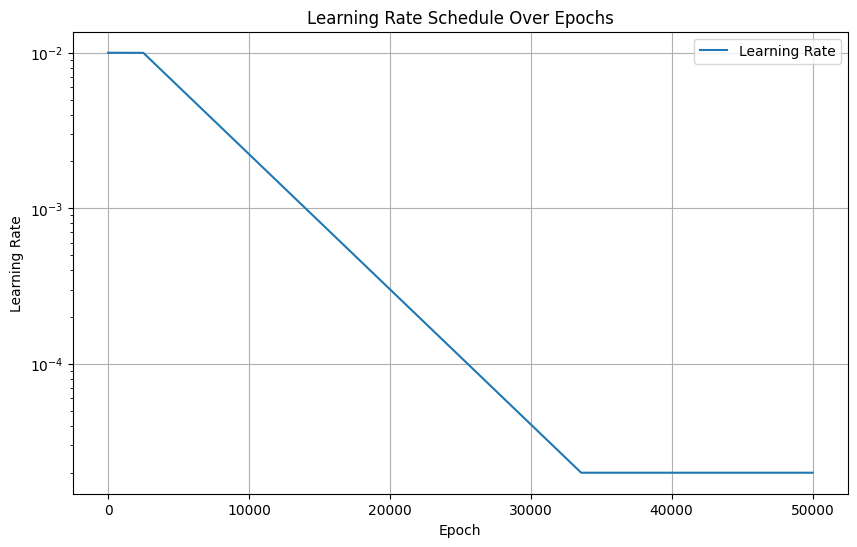

In [ ]:
import matplotlib.pyplot as plt

# Parameters
lr = 0.01
num_epochs = 50000
learning_rate_warmup_steps = 2500
lr_decay_parameter = 0.9998

# Learning rate schedule
def lr_lambda(epoch):
    if epoch < learning_rate_warmup_steps:
        return 1.0
    else:
        decay_lr = lr_decay_parameter ** (epoch - learning_rate_warmup_steps)
        return max(decay_lr, 2e-5 / lr)


# Calculate learning rates for each epoch
learning_rates = [lr * lr_lambda(epoch) for epoch in range(num_epochs)]

# Plot the learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')#
plt.yscale('log')
plt.title('Learning Rate Schedule Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
nodes = [(0, {'pos': (0.1, 0.65)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         (4, {'pos': (0.8, 0.05)}),
         (5, {'pos': (0.9, 0.1)}),
         (6, {'pos': (0.75, 0.15)}),
         (7, {'pos': (0.5, 0.2)}),
         (8, {'pos': (0.3, 0.3)}),
         (9, {'pos': (0.2, 0.3)}),
         (10, {'pos': (0.3, 0.4)}),
         (11, {'pos': (0.65, 0.35)}),
         (12, {'pos': (0.8, 0.5)}),
         (13, {'pos': (0.5, 0.5)}),
         (14, {'pos': (0.4, 0.65)}),
         (15, {'pos': (0.15, 0.6)}),
         (16, {'pos': (0.3, 0.7)}),
         (17, {'pos': (0.5, 0.7)}),
         (18, {'pos': (0.8, 0.8)}),
         (19, {'pos': (0.4, 0.8)}),
         (20, {'pos': (0.25, 0.85)}),
         (21, {'pos': (0.1, 0.9)}),
         (22, {'pos': (0.2, 0.95)}),
         (23, {'pos': (0.45, 0.9)}),
         (24, {'pos': (0.95, 0.95)}),
         (25, {'pos': (0.9, 0.4)}),
         (26, {'pos': (0.95, 0.05)}),
         (27, {'pos': (0.75, 1.0)})]
edges = [(0, 21), (0, 1), (0, 15), (21, 22), (22, 20), (20, 23), (23, 24), (24, 18), (19, 14), (14, 15), (15, 16), (16, 20), (19, 20), (19, 17), (14, 17), (14, 16), (17, 18), (12, 18), (12, 13), (13, 14), (10, 14), (1, 15), (9, 15), (1, 9), (1, 2), (11, 12), (9, 10), (3, 7), (2, 3), (7, 8), (8, 9), (8, 10), (10, 11), (8, 11), (6, 11), (3, 4), (4, 5), (4, 6), (5, 6), (24, 25), (12, 25), (5, 25), (11, 25), (5, 26), (23, 27), (24, 27)]


In [2]:
import torch
from torch import tensor
res = {'sample_list': [tensor([ 0,  2,  7, 11, 15, 20, 23, 24, 26, 29, 30, 34, 35, 36, 37, 39, 45]), tensor([ 0,  2,  7, 23, 24, 26, 29, 30, 34, 35, 36, 37, 39, 45]), tensor([ 0,  2, 23, 24, 30, 34, 37]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 36, 37]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 35, 36, 37]), tensor([ 0,  2, 23, 24, 30]), tensor([ 4, 12, 17, 18, 19, 21, 24, 40, 41]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 35, 36, 37, 45]), tensor([ 0,  2, 23, 24, 30, 34, 36, 37]), tensor([ 4, 12, 17, 18, 21, 24, 40, 41]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 36, 37]), tensor([ 4, 12, 17, 18, 19, 21, 24, 40, 41]), tensor([ 0,  2,  7, 11, 15, 20, 23, 24, 26, 29, 30, 34, 35, 36, 37, 39, 45]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 35, 36, 37]), tensor([ 4, 12, 17, 18, 19, 21, 24, 40, 41]), tensor([ 4, 12, 17, 18, 19, 21, 24, 40, 41]), tensor([ 0,  2,  7, 23, 24, 26, 29, 30, 34, 35, 36, 37, 39, 45]), tensor([ 0,  2, 23, 24, 30, 34, 37]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 36, 37]), tensor([ 0,  2, 23, 24, 26, 29, 30, 34, 36, 37])], 'ground_truth_hist': [tensor([[43, 36, 37, 34, 32]]), tensor([[23, 26, 20, 14, 16]]), tensor([[40, 18, 19, 14, 13]]), tensor([[ 5, 12,  8, 20, 32]]), tensor([[39, 41, 36, 35, 27]]), tensor([[44,  5, 11, 10, 22]]), tensor([[24, 28, 35, 36, 41]]), tensor([[ 9, 19, 18, 40, 41]]), tensor([[35, 27, 29, 30, 22]]), tensor([[39, 42, 33, 30, 22]]), tensor([[41, 40, 18, 19,  8]]), tensor([[ 0,  3,  4, 11, 15]]), tensor([[38, 34, 25, 18, 19]]), tensor([[ 7, 16, 13,  8, 20]]), tensor([[ 3,  4, 11, 15, 19]]), tensor([[10, 15, 14, 16, 17]]), tensor([[26, 32, 34, 38, 41]]), tensor([[45,  7, 17, 25, 33]]), tensor([[37, 34, 32, 26, 22]]), tensor([[ 2, 22, 26, 32, 34]])], 'ground_truth_fut': [tensor([[20, 15]]), tensor([[ 7, 45]]), tensor([[12,  4]]), tensor([[34, 37]]), tensor([[29, 30]]), tensor([[23, 24]]), tensor([[40, 17]]), tensor([[36, 35]]), tensor([[2, 0]]), tensor([[21, 24]]), tensor([[12,  4]]), tensor([[19, 18]]), tensor([[15, 11]]), tensor([[26, 23]]), tensor([[18, 40]]), tensor([[40, 41]]), tensor([[39, 45]]), tensor([[30, 23]]), tensor([[2, 0]]), tensor([[37, 36]])]}
samples = res['sample_list']
one_hot_samples = [torch.zeros(len(edges)) for _ in range(len(samples))]
ground_truth_fut = res['ground_truth_fut']
one_hot_futures = [torch.zeros(len(edges)) for _ in range(len(ground_truth_fut))]
for i, one_hot_sample in enumerate(one_hot_samples):
    for edge_index, edge in enumerate(edges):
        if edge_index in samples[i]:
            one_hot_sample[edges.index(edge)] = 1
for i, one_hot_fut in enumerate(one_hot_futures):
    for edge_index, edge in enumerate(edges):
        if edge_index in ground_truth_fut[i]:
            one_hot_fut[edges.index(edge)] = 1

In [3]:
from torchmetrics import F1Score
metric = F1Score(task='binary', average='micro', num_classes=2)
f1 = metric(torch.cat(one_hot_samples), torch.cat(one_hot_futures))
print(f1)

tensor(0.2915)


## With 1 sample

In [4]:
res = {'sample_list': [tensor([17, 37, 40]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([15, 18, 19]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([37]), tensor([10, 11, 18, 32, 36]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([11, 18, 32, 36, 39, 40]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18, 40]), tensor([15, 18, 19]), tensor([11, 18, 32, 36, 40]), tensor([40, 41]), tensor([15, 18, 19]), tensor([11, 32, 36, 39, 40]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18]), tensor([15, 18, 19, 45])], 'ground_truth_hist': [tensor([[24, 28, 35, 36, 41]]), tensor([[23, 26, 20, 14, 16]]), tensor([[ 7, 16, 13,  8, 20]]), tensor([[ 5, 12,  8, 20, 32]]), tensor([[43, 36, 37, 34, 32]]), tensor([[38, 34, 25, 18, 19]]), tensor([[35, 27, 29, 30, 22]]), tensor([[41, 40, 18, 19,  8]]), tensor([[39, 42, 33, 30, 22]]), tensor([[39, 41, 36, 35, 27]]), tensor([[37, 34, 32, 26, 22]]), tensor([[40, 18, 19, 14, 13]]), tensor([[ 0,  3,  4, 11, 15]]), tensor([[ 9, 19, 18, 40, 41]]), tensor([[10, 15, 14, 16, 17]]), tensor([[ 3,  4, 11, 15, 19]]), tensor([[26, 32, 34, 38, 41]]), tensor([[ 2, 22, 26, 32, 34]]), tensor([[44,  5, 11, 10, 22]]), tensor([[45,  7, 17, 25, 33]])], 'ground_truth_fut': [tensor([[40, 17]]), tensor([[ 7, 45]]), tensor([[26, 23]]), tensor([[34, 37]]), tensor([[20, 15]]), tensor([[15, 11]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[21, 24]]), tensor([[29, 30]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[19, 18]]), tensor([[36, 35]]), tensor([[40, 41]]), tensor([[18, 40]]), tensor([[39, 45]]), tensor([[37, 36]]), tensor([[23, 24]]), tensor([[30, 23]])]}

In [5]:
samples = res['sample_list']
one_hot_samples = [torch.zeros(len(edges)) for _ in range(len(samples))]
ground_truth_fut = res['ground_truth_fut']
one_hot_futures = [torch.zeros(len(edges)) for _ in range(len(ground_truth_fut))]
for i, one_hot_sample in enumerate(one_hot_samples):
    for edge_index, edge in enumerate(edges):
        if edge_index in samples[i]:
            one_hot_sample[edges.index(edge)] = 1
for i, one_hot_fut in enumerate(one_hot_futures):
    for edge_index, edge in enumerate(edges):
        if edge_index in ground_truth_fut[i]:
            one_hot_fut[edges.index(edge)] = 1
            
metric = F1Score(task='binary', average='micro', num_classes=2)
f1 = metric(torch.cat(one_hot_samples), torch.cat(one_hot_futures))
print(f1)

tensor(0.1900)


## With 10 samples

In [6]:
res = {'sample_list': [[tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40]), tensor([17, 37, 40])], [tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45])], [tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19])], [tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([ 0,  1,  2, 16, 20, 21, 26])], [tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37]), tensor([37])], [tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36]), tensor([10, 11, 18, 32, 36])], [tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45])], [tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40]), tensor([11, 18, 32, 36, 39, 40])], [tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34])], [tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45])], [tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45])], [tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40]), tensor([18, 40])], [tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19])], [tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40]), tensor([11, 18, 32, 36, 40])], [tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41]), tensor([40, 41])], [tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19]), tensor([15, 18, 19])], [tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40]), tensor([11, 32, 36, 39, 40])], [tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45])], [tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18]), tensor([18])], [tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45]), tensor([15, 18, 19, 45])]], 'ground_truth_hist': [tensor([[24, 28, 35, 36, 41]]), tensor([[23, 26, 20, 14, 16]]), tensor([[ 7, 16, 13,  8, 20]]), tensor([[ 5, 12,  8, 20, 32]]), tensor([[43, 36, 37, 34, 32]]), tensor([[38, 34, 25, 18, 19]]), tensor([[35, 27, 29, 30, 22]]), tensor([[41, 40, 18, 19,  8]]), tensor([[39, 42, 33, 30, 22]]), tensor([[39, 41, 36, 35, 27]]), tensor([[37, 34, 32, 26, 22]]), tensor([[40, 18, 19, 14, 13]]), tensor([[ 0,  3,  4, 11, 15]]), tensor([[ 9, 19, 18, 40, 41]]), tensor([[10, 15, 14, 16, 17]]), tensor([[ 3,  4, 11, 15, 19]]), tensor([[26, 32, 34, 38, 41]]), tensor([[ 2, 22, 26, 32, 34]]), tensor([[44,  5, 11, 10, 22]]), tensor([[45,  7, 17, 25, 33]])], 'ground_truth_fut': [tensor([[40, 17]]), tensor([[ 7, 45]]), tensor([[26, 23]]), tensor([[34, 37]]), tensor([[20, 15]]), tensor([[15, 11]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[21, 24]]), tensor([[29, 30]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[19, 18]]), tensor([[36, 35]]), tensor([[40, 41]]), tensor([[18, 40]]), tensor([[39, 45]]), tensor([[37, 36]]), tensor([[23, 24]]), tensor([[30, 23]])]}

In [7]:
samples = [res['sample_list'][i][0] for i in range(len(res['sample_list']))]
print(samples)
one_hot_samples = [torch.zeros(len(edges)) for _ in range(len(samples))]
ground_truth_fut = res['ground_truth_fut']
one_hot_futures = [torch.zeros(len(edges)) for _ in range(len(ground_truth_fut))]
for i, one_hot_sample in enumerate(one_hot_samples):
    for edge_index, edge in enumerate(edges):
        if edge_index in samples[i]:
            one_hot_sample[edges.index(edge)] = 1
for i, one_hot_fut in enumerate(one_hot_futures):
    for edge_index, edge in enumerate(edges):
        if edge_index in ground_truth_fut[i]:
            one_hot_fut[edges.index(edge)] = 1
            
metric = F1Score(task='binary', average='macro', num_classes=2)
f1_tot = 0
for i in range(len(res['sample_list'])):
    f1 = metric(one_hot_samples[i], one_hot_futures[i])
    f1_tot += f1
f1 = f1_tot / len(res['sample_list'])
print(one_hot_samples[0])
print(f1)

[tensor([17, 37, 40]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([15, 18, 19]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([37]), tensor([10, 11, 18, 32, 36]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([11, 18, 32, 36, 39, 40]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18, 40]), tensor([15, 18, 19]), tensor([11, 18, 32, 36, 40]), tensor([40, 41]), tensor([15, 18, 19]), tensor([11, 32, 36, 39, 40]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18]), tensor([15, 18, 19, 45])]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
sample_10 = [tensor([17, 37, 40]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([15, 18, 19]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([37]), tensor([10, 11, 18, 32, 36]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([11, 18, 32, 36, 39, 40]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18, 40]), tensor([15, 18, 19]), tensor([11, 18, 32, 36, 40]), tensor([40, 41]), tensor([15, 18, 19]), tensor([11, 32, 36, 39, 40]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18]), tensor([15, 18, 19, 45])]
sample_1 = [tensor([17, 37, 40]), tensor([ 0,  1,  2,  6,  7, 16, 19, 20, 21, 26, 29, 38, 39, 45]), tensor([15, 18, 19]), tensor([ 0,  1,  2, 16, 20, 21, 26]), tensor([37]), tensor([10, 11, 18, 32, 36]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([11, 18, 32, 36, 39, 40]), tensor([ 0,  1,  2, 13, 21, 24, 27, 28, 29, 30, 34]), tensor([16, 17, 23, 24, 34, 37, 40, 43, 44, 45]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18, 40]), tensor([15, 18, 19]), tensor([11, 18, 32, 36, 40]), tensor([40, 41]), tensor([15, 18, 19]), tensor([11, 32, 36, 39, 40]), tensor([ 0,  1,  2,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 34,
        37, 40, 41, 42, 43, 44, 45]), tensor([18]), tensor([15, 18, 19, 45])]
for j in range(10):
        sample_10 = [res['sample_list'][i][j] for i in range(len(res['sample_list']))]
        equal = 0
        for i in range(len(sample_10)):
                if sample_10[i].equal(sample_1[i]):
                        equal += 1
                
        print(f"Ratio of equal samples for sample {j}:", equal/len(sample_10))

Ratio of equal samples for sample 0: 1.0
Ratio of equal samples for sample 1: 1.0
Ratio of equal samples for sample 2: 1.0
Ratio of equal samples for sample 3: 1.0
Ratio of equal samples for sample 4: 1.0
Ratio of equal samples for sample 5: 1.0
Ratio of equal samples for sample 6: 1.0
Ratio of equal samples for sample 7: 1.0
Ratio of equal samples for sample 8: 1.0
Ratio of equal samples for sample 9: 1.0


In [9]:
res = {'sample_list': [tensor([11, 12, 18, 19]), tensor([18, 19]), tensor([18, 19]), tensor([35, 36]), tensor([11, 12]), tensor([11, 12]), tensor([18, 19]), tensor([41]), tensor([24, 35, 36]), tensor([24, 35, 36]), tensor([11, 12, 19]), tensor([20, 21, 40, 41]), tensor([20, 21, 40, 41]), tensor([20, 21, 41]), tensor([35, 36]), tensor([ 0,  2, 40, 41]), tensor([11, 12]), tensor([35, 36]), tensor([11, 12]), tensor([36])],


'ground_truth_hist': [tensor([[45,  7, 17, 25, 33]]), tensor([[ 7, 16, 13,  8, 20]]), tensor([[ 0,  3,  4, 11, 15]]), tensor([[43, 36, 37, 34, 32]]), tensor([[40, 18, 19, 14, 13]]), tensor([[41, 40, 18, 19,  8]]), tensor([[10, 15, 14, 16, 17]]), tensor([[ 5, 12,  8, 20, 32]]), tensor([[ 9, 19, 18, 40, 41]]), tensor([[23, 26, 20, 14, 16]]), tensor([[ 3,  4, 11, 15, 19]]), tensor([[37, 34, 32, 26, 22]]), tensor([[35, 27, 29, 30, 22]]), tensor([[39, 42, 33, 30, 22]]), tensor([[24, 28, 35, 36, 41]]), tensor([[ 2, 22, 26, 32, 34]]), tensor([[39, 41, 36, 35, 27]]), tensor([[26, 32, 34, 38, 41]]), tensor([[38, 34, 25, 18, 19]]), tensor([[44,  5, 11, 10, 22]])],


'ground_truth_fut': [tensor([[30, 23]]), tensor([[26, 23]]), tensor([[19, 18]]), tensor([[20, 15]]), tensor([[12,  4]]), tensor([[12,  4]]), tensor([[40, 41]]), tensor([[34, 37]]), tensor([[36, 35]]), tensor([[ 7, 45]]), tensor([[18, 40]]), tensor([[2, 0]]), tensor([[2, 0]]), tensor([[21, 24]]), tensor([[40, 17]]), tensor([[37, 36]]), tensor([[29, 30]]), tensor([[39, 45]]), tensor([[15, 11]]), tensor([[23, 24]])]}

In [10]:
samples = res['sample_list']
one_hot_samples = [torch.zeros(len(edges)) for _ in range(len(samples))]
ground_truth_fut = res['ground_truth_fut']
one_hot_futures = [torch.zeros(len(edges)) for _ in range(len(ground_truth_fut))]
for i, one_hot_sample in enumerate(one_hot_samples):
    for edge_index, edge in enumerate(edges):
        if edge_index in samples[i]:
            one_hot_sample[edges.index(edge)] = 1
for i, one_hot_fut in enumerate(one_hot_futures):
    for edge_index, edge in enumerate(edges):
        if edge_index in ground_truth_fut[i]:
            one_hot_fut[edges.index(edge)] = 1
            
metric = F1Score(task='binary', average='micro', num_classes=2)
f1 = metric(torch.cat(one_hot_samples).reshape(20, 46), torch.cat(one_hot_futures).reshape(20, 46))
print(f1)

tensor(0.1778)


In [11]:
print(torch.cat(one_hot_samples))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [12]:
print(len(torch.cat(one_hot_samples).reshape(20, 46)[0]))

46


In [14]:
True_Future = tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Predicted_Future = tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
metric = F1Score(task='binary', average='macro', num_classes=2)
f1 = metric(Predicted_Future, True_Future)
print(f1)

tensor(0.8889)


In [23]:
res = {'sample_list': [tensor([], dtype=torch.int64), tensor([ 7, 22, 23]), tensor([], dtype=torch.int64), tensor([ 4,  5, 34, 36, 37]), tensor([0]), tensor([10, 11, 15, 18, 19]), tensor([0]), tensor([0]), tensor([21, 23, 39, 45]), tensor([ 0, 29, 30, 36]), tensor([0, 4]), tensor([0]), tensor([0]), tensor([17, 35, 40]), tensor([], dtype=torch.int64), tensor([0]), tensor([0]), tensor([ 4,  5, 34, 36, 37]), tensor([21, 23, 24, 39, 40, 45]), tensor([21, 30])], 'ground_truth_hist': [tensor([[24, 28, 35, 36, 41]]), tensor([[23, 26, 20, 14, 16]]), tensor([[ 7, 16, 13,  8, 20]]), tensor([[ 5, 12,  8, 20, 32]]), tensor([[43, 36, 37, 34, 32]]), tensor([[38, 34, 25, 18, 19]]), tensor([[35, 27, 29, 30, 22]]), tensor([[41, 40, 18, 19,  8]]), tensor([[39, 42, 33, 30, 22]]), tensor([[39, 41, 36, 35, 27]]), tensor([[37, 34, 32, 26, 22]]), tensor([[40, 18, 19, 14, 13]]), tensor([[ 0,  3,  4, 11, 15]]), tensor([[ 9, 19, 18, 40, 41]]), tensor([[10, 15, 14, 16, 17]]), tensor([[ 3,  4, 11, 15, 19]]), tensor([[26, 32, 34, 38, 41]]), tensor([[ 2, 22, 26, 32, 34]]), tensor([[44,  5, 11, 10, 22]]), tensor([[45,  7, 17, 25, 33]])], 'ground_truth_fut': [tensor([[40, 17]]), tensor([[ 7, 45]]), tensor([[26, 23]]), tensor([[34, 37]]), tensor([[20, 15]]), tensor([[15, 11]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[21, 24]]), tensor([[29, 30]]), tensor([[2, 0]]), tensor([[12,  4]]), tensor([[19, 18]]), tensor([[36, 35]]), tensor([[40, 41]]), tensor([[18, 40]]), tensor([[39, 45]]), tensor([[37, 36]]), tensor([[23, 24]]), tensor([[30, 23]])]}

In [25]:
samples = res['sample_list']
one_hot_samples = [torch.zeros(len(edges)) for _ in range(len(samples))]
ground_truth_fut = res['ground_truth_fut']
one_hot_futures = [torch.zeros(len(edges)) for _ in range(len(ground_truth_fut))]
for i, one_hot_sample in enumerate(one_hot_samples):
    for edge_index, edge in enumerate(edges):
        if edge_index in samples[i]:
            one_hot_sample[edges.index(edge)] = 1
for i, one_hot_fut in enumerate(one_hot_futures):
    for edge_index, edge in enumerate(edges):
        if edge_index in ground_truth_fut[i]:
            one_hot_fut[edges.index(edge)] = 1
metric = F1Score(task='binary', average='macro', num_classes=2)
f1 = metric(torch.cat(one_hot_samples), torch.cat(one_hot_futures))
print(f1)

tensor(0.3721)


In [2]:
import torch.nn.functional as F
import torch

In [3]:
def _get_gaussian_transition_mat(t):
        r"""Computes transition matrix for q(x_t|x_{t-1}).

        This method constructs a transition matrix Q with
        decaying entries as a function of how far off diagonal the entry is.
        Normalization option 1:
        Q_{ij} =  ~ softmax(-val^2/beta_t)   if |i-j| <= transition_bands
                    1 - \sum_{l \neq i} Q_{il}  if i==j.
                    0                          else.

        Normalization option 2:
        tilde{Q}_{ij} =  softmax(-val^2/beta_t)   if |i-j| <= transition_bands
                            0                        else.

        Q_{ij} =  tilde{Q}_{ij} / sum_l{tilde{Q}_{lj}}

        Args:
            t: timestep. integer scalar (or numpy array?)

        Returns:
            Q_t: transition matrix. shape = (num_classes, num_classes).
        """
        
        num_classes = 2
        transition_bands = num_classes - 1 # 1

        betas = torch.linspace(0.9, 1.0, 1000)
        beta_t = betas[t]

        mat = torch.zeros((num_classes, num_classes),
                        dtype=torch.float64)

        # Make the values correspond to a similar type of gaussian as in the
        # gaussian diffusion case for continuous state spaces.
        values = torch.linspace(torch.tensor(0.), torch.tensor(num_classes-1), num_classes, dtype=torch.float64)
        values = values * 2./ (num_classes - 1.)
        values = values[:transition_bands+1]
        values = -values * values / beta_t
        
        # To reverse the tensor 'values' starting from the second element
        reversed_values = values[1:].flip(dims=[0])
        # Concatenating the reversed values with the original values
        values = torch.cat([reversed_values, values], dim=0)
        values = F.softmax(values, dim=0)
        values = values[transition_bands:]
        
        for k in range(1, transition_bands + 1):
            off_diag = torch.full((num_classes - k,), values[k], dtype=torch.float64)

            mat += torch.diag(off_diag, k)
            mat += torch.diag(off_diag, -k)

        # Add diagonal values such that rows and columns sum to one.
        # Technically only the ROWS need to sum to one
        # NOTE: this normalization leads to a doubly stochastic matrix,
        # which is necessary if we want to have a uniform stationary distribution.
        diag = 1. - mat.sum(dim=1)
        mat += torch.diag_embed(diag)

        return mat

_get_gaussian_transition_mat(999)

tensor([[0.9823, 0.0177],
        [0.0177, 0.9823]], dtype=torch.float64)

In [33]:
def _get_prior_distribution_transition_mat(t):
    """Computes transition matrix for q(x_t|x_{t-1}).

    Args:
    t: timestep. integer scalar.

    Returns:
    Q_t: transition matrix. shape = (num_classes, num_classes).
    """
    betas = torch.linspace(0.001, 0.2, 1000)
    beta_t = betas[t]
    steps = torch.linspace(0, 1, 1000 + 1, dtype=torch.float64)
    alpha_bar = torch.cos((steps + 0.008) / 1.008 * torch.pi / 2)
    betas = torch.minimum(1 - alpha_bar[1:] / alpha_bar[:-1], torch.tensor(0.999))
    beta_t = betas[t]
    print(beta_t)
    num_classes = 2
    class_weights = [0.9, 0.1]
    mat = torch.zeros((num_classes, num_classes), dtype=torch.float64)

    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                mat[i, j] = beta_t * class_weights[j]
            else:
                mat[i, j] = 1 - beta_t + beta_t * class_weights[j]
    
    return mat

_get_prior_distribution_transition_mat(999)

tensor(0.9990, dtype=torch.float64)


tensor([[0.9001, 0.0999],
        [0.8991, 0.1009]], dtype=torch.float64)

In [41]:
import torch
import numpy as np

def cosine_beta_schedule_discrete(timesteps, s=0.008):
    """ Cosine schedule as proposed in https://openreview.net/forum?id=-NEXDKk8gZ. """
    steps = timesteps + 2
    x = np.linspace(0, steps, steps)

    alphas_cumprod = np.cos(0.5 * np.pi * ((x / steps) + s) / (1 + s)) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    alphas = (alphas_cumprod[1:] / alphas_cumprod[:-1])
    betas = 1 - alphas
    return torch.tensor(betas, dtype=torch.float64)

class PlaceHolder:
    def __init__(self, X, E, y):
        self.X = X
        self.E = E
        self.y = y

    def type_as(self, x: torch.Tensor):
        """ Changes the device and dtype of X, E, y. """
        self.X = self.X.type_as(x)
        self.E = self.E.type_as(x)
        self.y = self.y.type_as(x)
        return self

    def mask(self, node_mask, collapse=False):
        x_mask = node_mask.unsqueeze(-1)          # bs, n, 1
        e_mask1 = x_mask.unsqueeze(2)             # bs, n, 1, 1
        e_mask2 = x_mask.unsqueeze(1)             # bs, 1, n, 1

        if collapse:
            self.X = torch.argmax(self.X, dim=-1)
            self.E = torch.argmax(self.E, dim=-1)

            self.X[node_mask == 0] = - 1
            self.E[(e_mask1 * e_mask2).squeeze(-1) == 0] = - 1
        else:
            self.X = self.X * x_mask
            self.E = self.E * e_mask1 * e_mask2
            assert torch.allclose(self.E, torch.transpose(self.E, 1, 2))
        return self

class DiscreteUniformTransition:
    def __init__(self, x_classes: int, e_classes: int, y_classes: int):
        self.X_classes = x_classes
        self.E_classes = e_classes
        self.y_classes = y_classes
        self.u_x = torch.ones(1, self.X_classes, self.X_classes)
        if self.X_classes > 0:
            self.u_x = self.u_x / self.X_classes

        self.u_e = torch.ones(1, self.E_classes, self.E_classes)
        if self.E_classes > 0:
            self.u_e = self.u_e / self.E_classes

        self.u_y = torch.ones(1, self.y_classes, self.y_classes)
        if self.y_classes > 0:
            self.u_y = self.u_y / self.y_classes

    def get_Qt(self, beta_t, device):
        """ Returns one-step transition matrices for X and E, from step t - 1 to step t.
        Qt = (1 - beta_t) * I + beta_t / K

        beta_t: (bs)                         noise level between 0 and 1
        returns: qx (bs, dx, dx), qe (bs, de, de), qy (bs, dy, dy).
        """
        beta_t = beta_t.unsqueeze(1).unsqueeze(1)
        beta_t = beta_t.to(device)
        self.u_x = self.u_x.to(device)
        self.u_e = self.u_e.to(device)
        self.u_y = self.u_y.to(device)

        q_x = beta_t * self.u_x + (1 - beta_t) * torch.eye(self.X_classes, device=device).unsqueeze(0)
        q_e = beta_t * self.u_e + (1 - beta_t) * torch.eye(self.E_classes, device=device).unsqueeze(0)
        q_y = beta_t * self.u_y + (1 - beta_t) * torch.eye(self.y_classes, device=device).unsqueeze(0)

        return PlaceHolder(X=q_x, E=q_e, y=q_y)
    
class MarginalUniformTransition:
    def __init__(self, x_marginals, e_marginals, y_classes):
        self.X_classes = len(x_marginals)
        self.E_classes = len(e_marginals)
        self.y_classes = y_classes
        self.x_marginals = x_marginals
        self.e_marginals = e_marginals

        self.u_x = x_marginals.unsqueeze(0).expand(self.X_classes, -1).unsqueeze(0)
        self.u_e = e_marginals.unsqueeze(0).expand(self.E_classes, -1).unsqueeze(0)
        self.u_y = torch.ones(1, self.y_classes, self.y_classes)
        if self.y_classes > 0:
            self.u_y = self.u_y / self.y_classes

    def get_Qt(self, beta_t, device):
        """ Returns one-step transition matrices for X and E, from step t - 1 to step t.
        Qt = (1 - beta_t) * I + beta_t / K

        beta_t: (bs)                         noise level between 0 and 1
        returns: qx (bs, dx, dx), qe (bs, de, de), qy (bs, dy, dy). """
        beta_t = beta_t.unsqueeze(1).unsqueeze(1)
        print(beta_t[100])
        beta_t = beta_t.to(device)
        self.u_x = self.u_x.to(device)
        self.u_e = self.u_e.to(device)
        self.u_y = self.u_y.to(device)

        q_x = beta_t * self.u_x + (1 - beta_t) * torch.eye(self.X_classes, device=device).unsqueeze(0)
        q_e = beta_t * self.u_e + (1 - beta_t) * torch.eye(self.E_classes, device=device).unsqueeze(0)
        q_y = beta_t * self.u_y + (1 - beta_t) * torch.eye(self.y_classes, device=device).unsqueeze(0)

        return PlaceHolder(X=q_x, E=q_e, y=q_y)

# Example usage
timesteps = 1000
betas = cosine_beta_schedule_discrete(timesteps)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transition = MarginalUniformTransition(x_marginals=torch.tensor([0.5, 0.5]), e_marginals=torch.tensor([0.9, 0.1]), y_classes=2)
beta_t = betas.to(device)
q_t_matrices = transition.get_Qt(beta_t, device)

# Print the transition matrix for edges at the final timestep
print("Transition matrix for edges (q_e) at the final timestep:")
t = 997
print(q_t_matrices.E[t+1])
print(_get_prior_distribution_transition_mat(t))

tensor([[0.0005]], dtype=torch.float64)
Transition matrix for edges (q_e) at the final timestep:
tensor([[0.9444, 0.0556],
        [0.5000, 0.5000]], dtype=torch.float64)
tensor(0.3333, dtype=torch.float64)
tensor([[0.9667, 0.0333],
        [0.3000, 0.7000]], dtype=torch.float64)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
N = 1000  # number of trials
p = 0.012  # probability of success
n_values = np.arange(0, 21)  # number of successes from 0 to 20

# Calculate the probabilities
probabilities = binom.pmf(n_values, N, p)

# Display the probabilities
for n, prob in zip(n_values, probabilities):
    print(f"P(X = {n}) = {prob:.10f}")

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.stem(n_values, probabilities, use_line_collection=True)
plt.xlabel('Number of successes (n)')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF (N=1000, p=0.012)')
plt.grid(True)
plt.show()


P(X = 0) = 0.0000057141
P(X = 1) = 0.0000694015
P(X = 2) = 0.0004210452
P(X = 3) = 0.0017012270
P(X = 4) = 0.0051501721
P(X = 5) = 0.0124604973
P(X = 6) = 0.0250975603
P(X = 7) = 0.0432856709
P(X = 8) = 0.0652570918
P(X = 9) = 0.0873617208
P(X = 10) = 0.1051523870
P(X = 11) = 0.1149439048
P(X = 12) = 0.1150602448
P(X = 13) = 0.1062094568
P(X = 14) = 0.0909445348
P(X = 15) = 0.0726083493
P(X = 16) = 0.0542909089
P(X = 17) = 0.0381678407
P(X = 18) = 0.0253164558
P(X = 19) = 0.0158922392
P(X = 20) = 0.0094677854


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1000x600 with 0 Axes>